In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import string
from types import SimpleNamespace

import tqdm.auto as tqdm

from sketch_hypergraph.language.sampler import *

from sketch_hypergraph.language.canvas import ValidatingCanvas
from sketch_hypergraph.language.sketch_hypergraph_grammar import standard_grammar, value_grammar
from sketch_hypergraph.language.ast_constructor import ASTConstructionState
from sketch_hypergraph.language.types import BaseType, TypeEnv, WithinContext
from sketch_hypergraph.language.statement_signature import PrimitiveStatementSignature
from sketch_hypergraph.language.utils import fit_circle
from sketch_hypergraph.language.evaluation import EvaluationContext, Environment, Number
from sketch_hypergraph.language.value import *
from sketch_hypergraph.language.renderer import *

In [4]:
alphabet = SimpleNamespace(
    variables=list(string.ascii_lowercase), numbers=list(range(10))
)
context = EvaluationContext.of(
    PrimitiveStatementSignature("Point", [BaseType.numeric] * 2, [BaseType.point], require_distinct=False),
    PrimitiveStatementSignature("Line", [BaseType.point] * 2, [], require_distinct=True),
    PrimitiveStatementSignature("Arc", [BaseType.point] * 3, [], require_distinct=True),
    PrimitiveStatementSignature("Circle", [BaseType.point] * 4, [], require_distinct=True),
)
grammar = standard_grammar(
    string.ascii_lowercase,
    list(range(10)),
    10,
    context=context,
)

sampler_spec = dict(
    type="SamplingDriver",
    weights={
        "Constant": 3,
        "Variable": 3,
        "NBinop": 1,
        "BNBinop": 8,
        "BBBinop": 1,
        "BUnop": 1,
        "Point": 0.5,
        "Circle": 1,
        "Line": 1,
        "Arc": 1,
        "For": 0,
        "If": 0,
    },
)

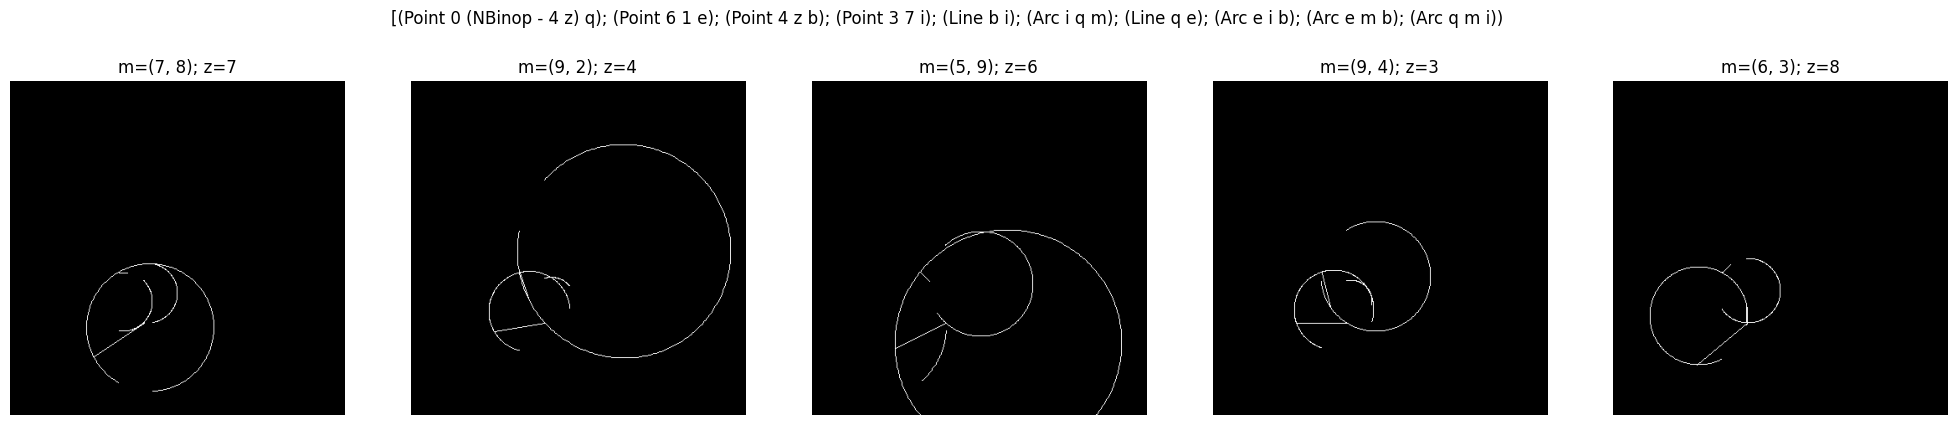

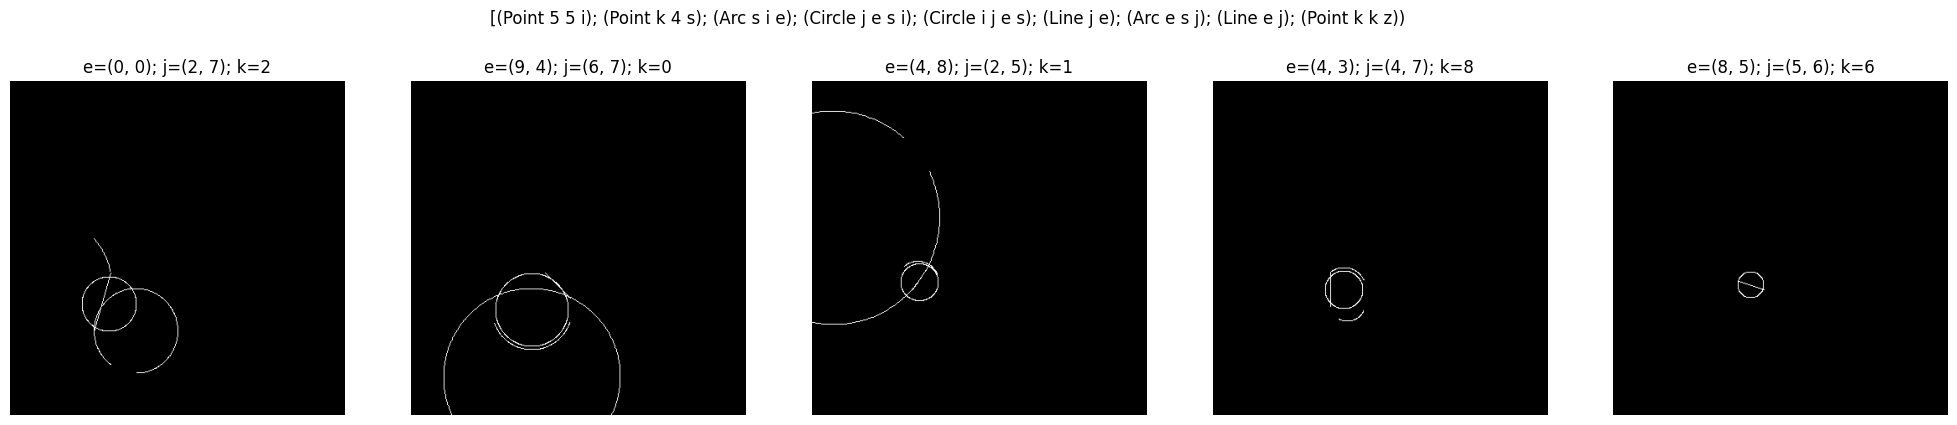

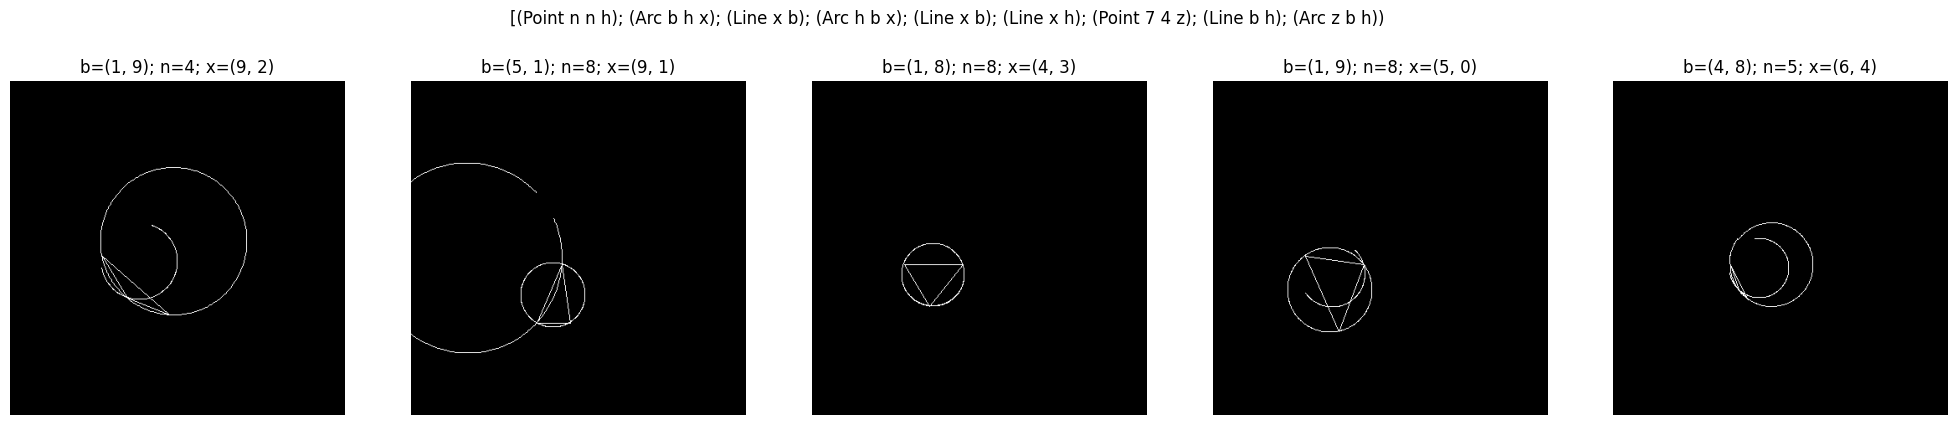

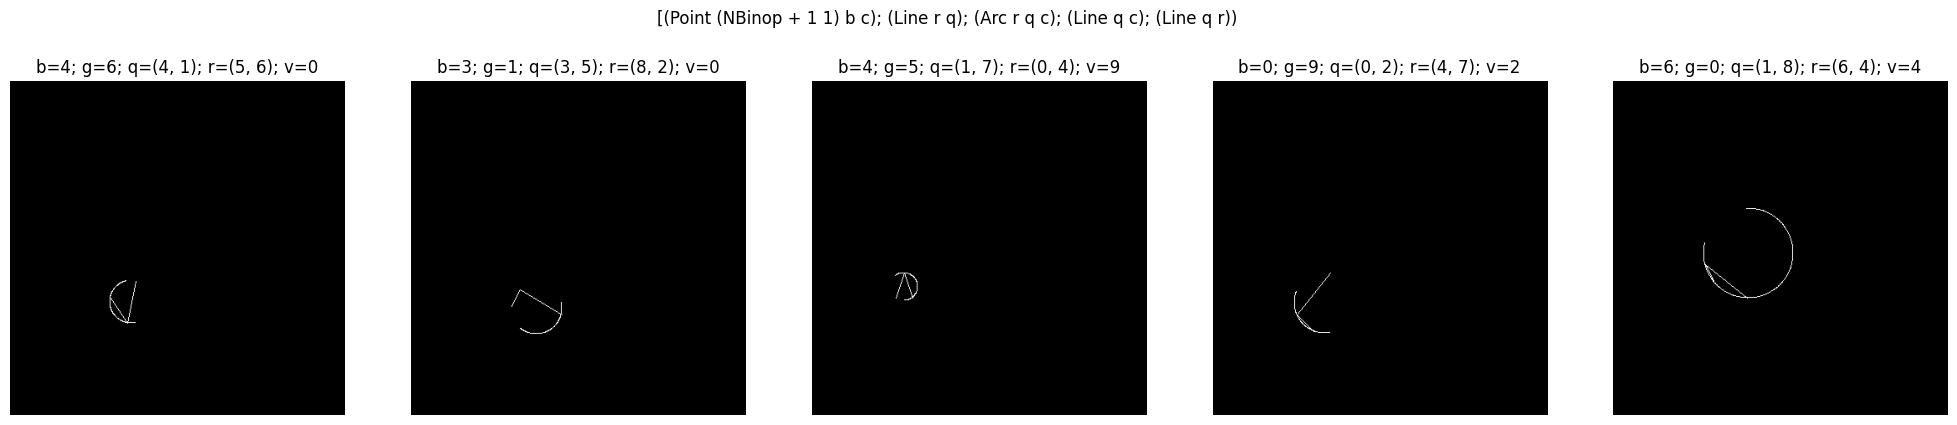

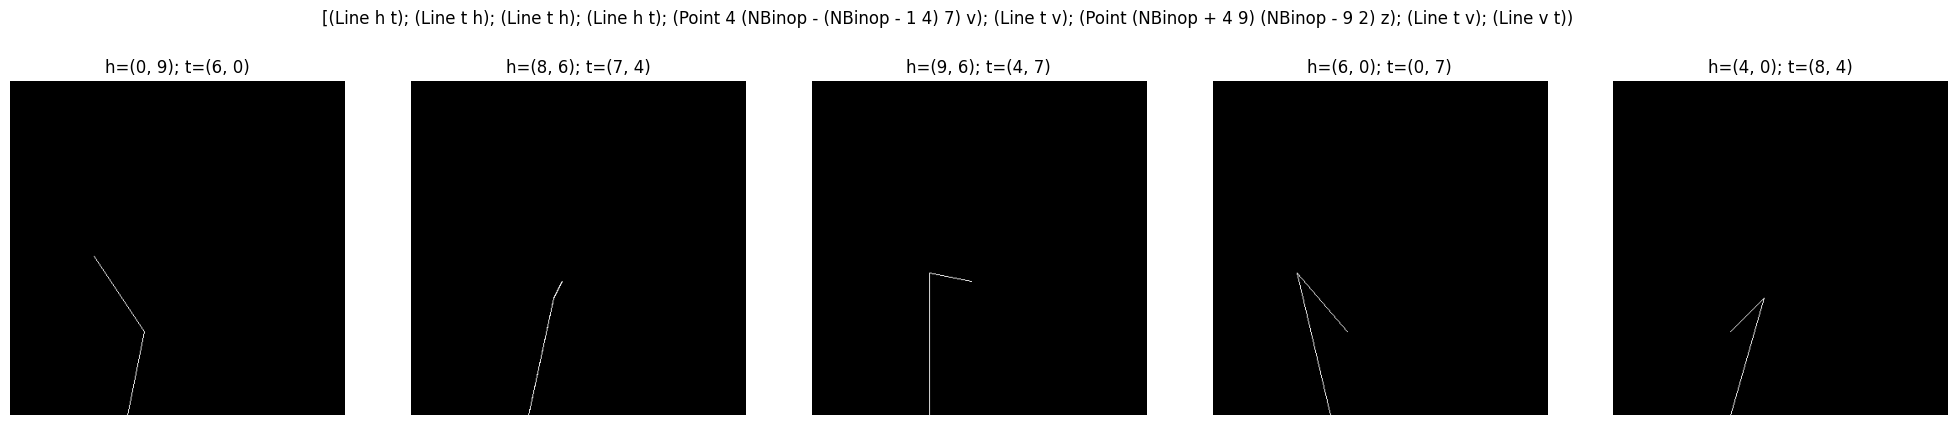

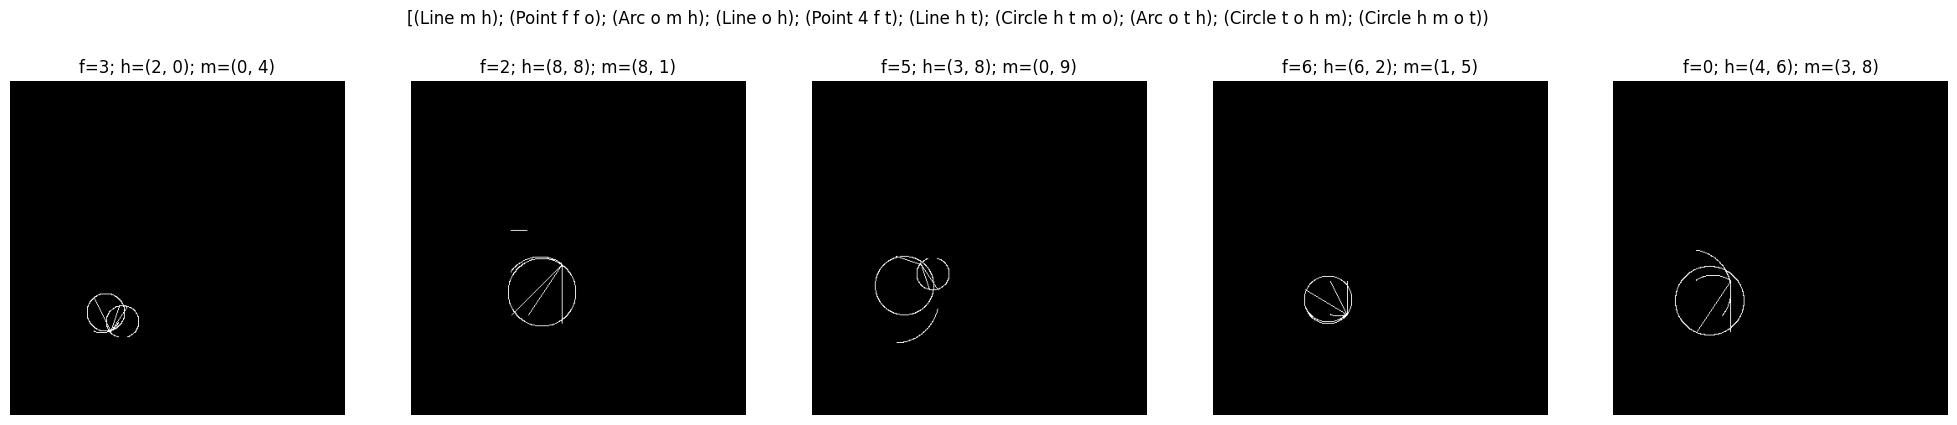

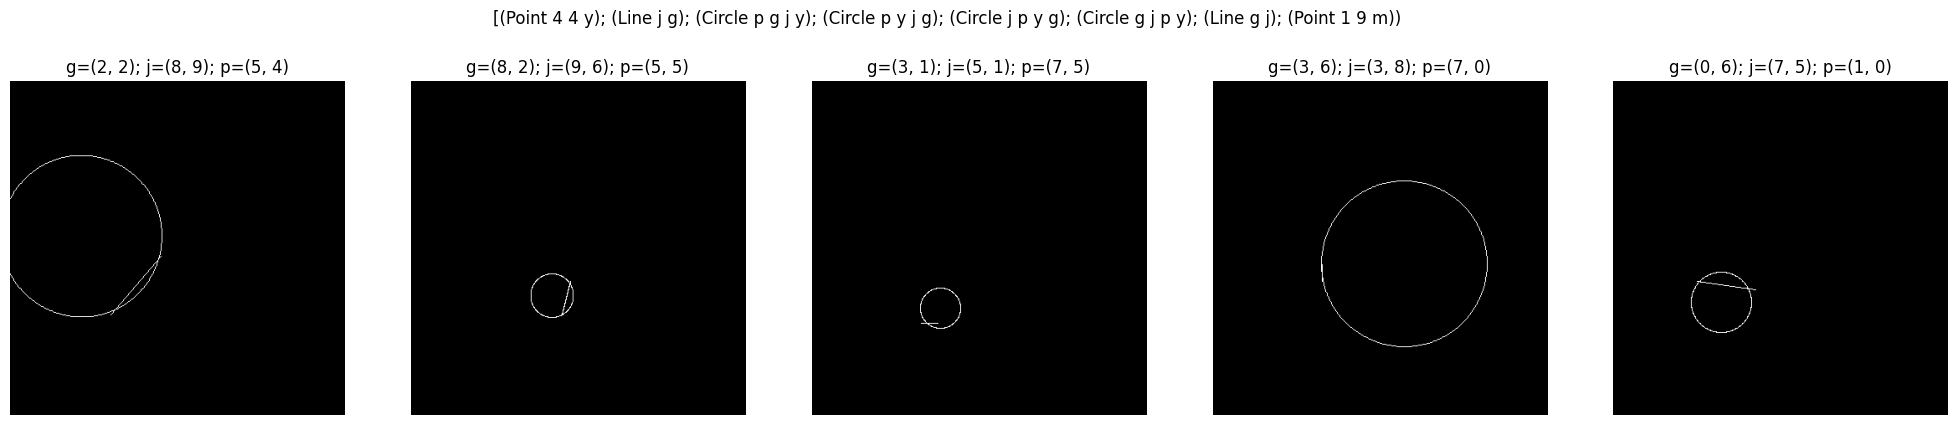

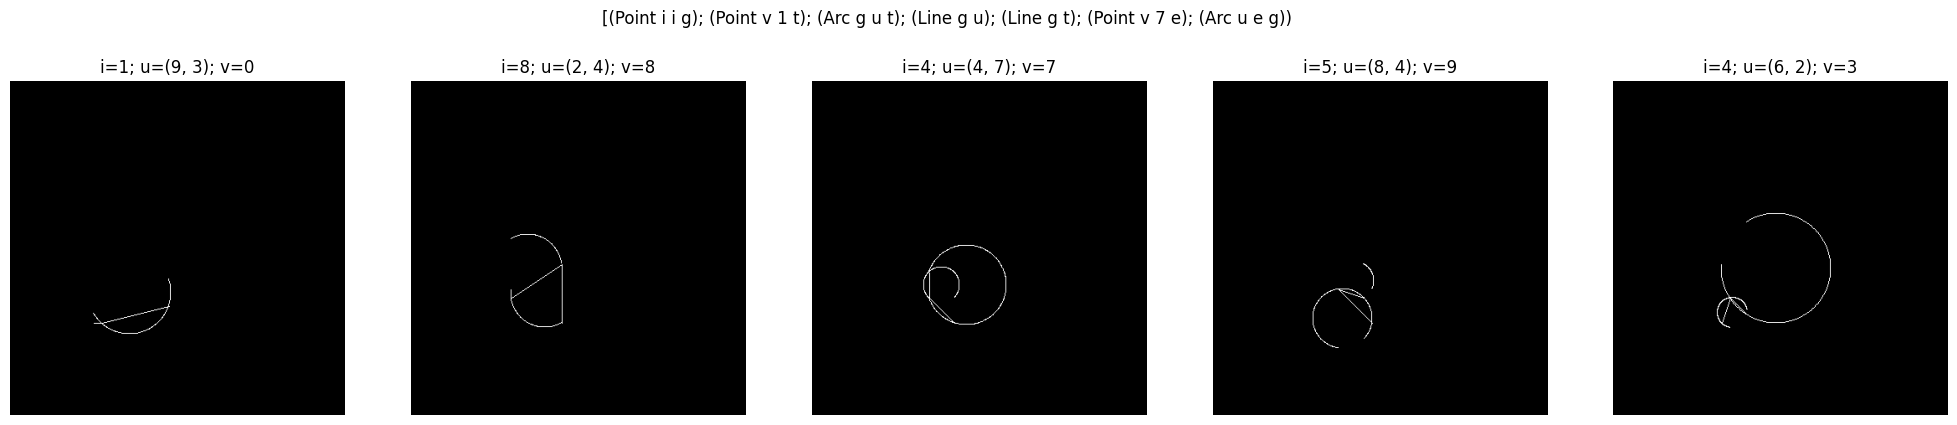

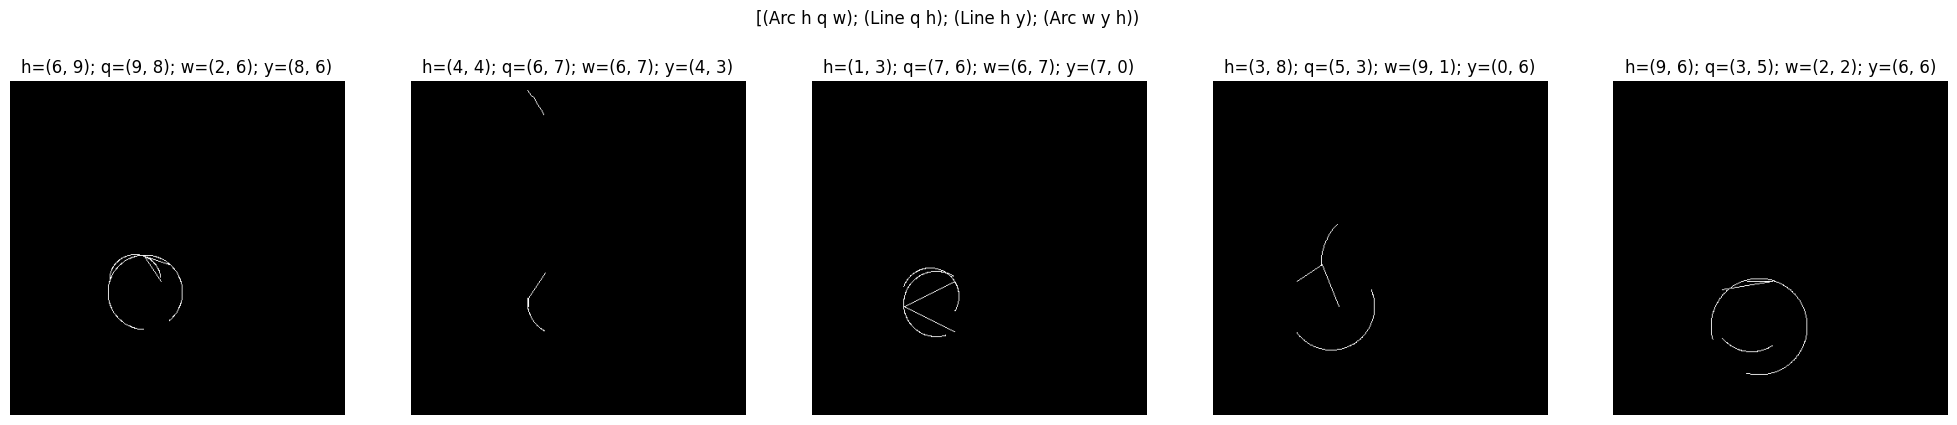

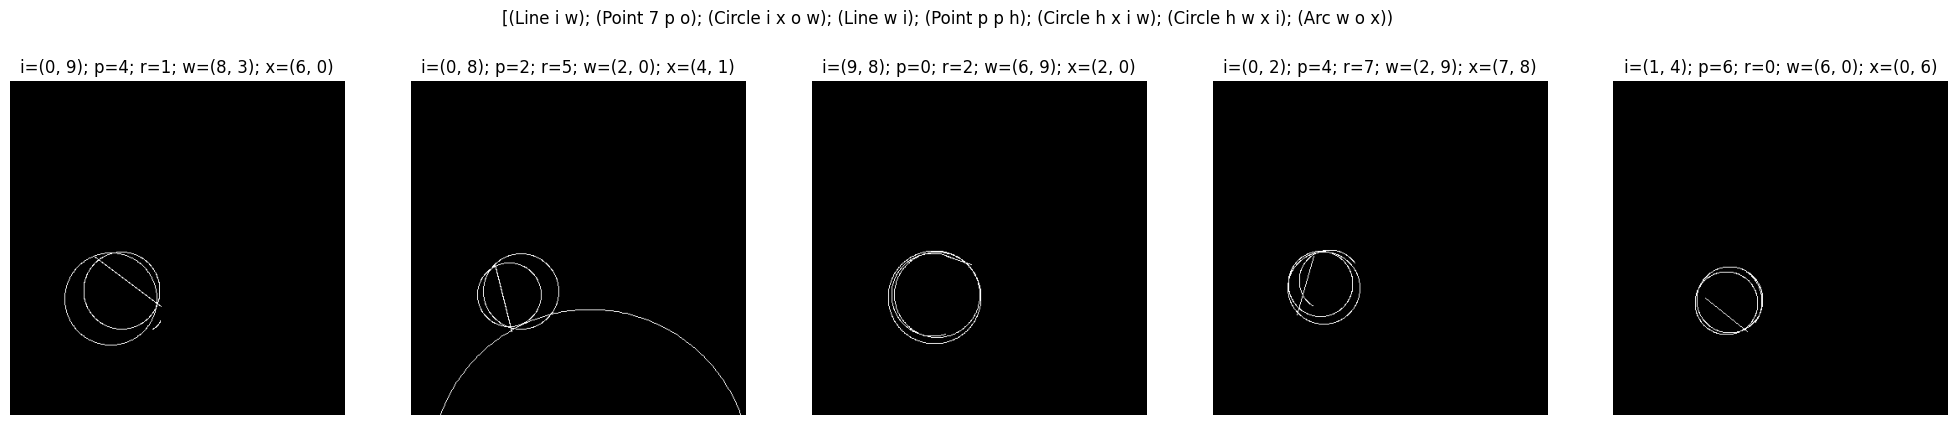

In [5]:
for seed in range(10):
    res = sample_valid_datapoint(
        np.random.RandomState(seed),
        sampler_spec=sampler_spec,
        grammar=grammar,
        g_value=value_grammar(alphabet.numbers),
        t_value=[(BaseType.numeric, 1), (BaseType.point, 1)],
        max_type_size=5,
        e_context=context,
        num_elements=5,
        minimal_objects=4,
    )
    render(res)